In [89]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

In [46]:
import re
line = "Total DISK READ:    578868.47 K/s | Total DISK WRITE:         0.00 K/s"

p = re.compile("^Total DISK READ:\s*(\d*\.\d\d) K/s \| Total DISK WRITE:\s*(\d*\.\d\d) K/s")

read_and_write_kbyte_per_s = []
with open("iotop.output") as fh:
    for line in fh.readlines():
        match = p.search(line)
        if match is None:
            continue
        read_kbyte_per_s, write_kbyte_per_s = match.groups()
        read_kbyte_per_s, write_kbyte_per_s = float(read_kbyte_per_s), (write_kbyte_per_s)
        read_and_write_kbyte_per_s.append((read_kbyte_per_s, write_kbyte_per_s))

In [95]:
STEP_SECS = 0.01
n = len(read_and_write_kbyte_per_s)
df = pd.DataFrame(
    read_and_write_kbyte_per_s,
    columns=["read_kbyte_per_s", "write_kbyte_per_s"],
    index=np.arange(0, STEP_SECS * (n - 0.5), STEP_SECS)
    )

Text(30.9, 2.9, 'NPY')

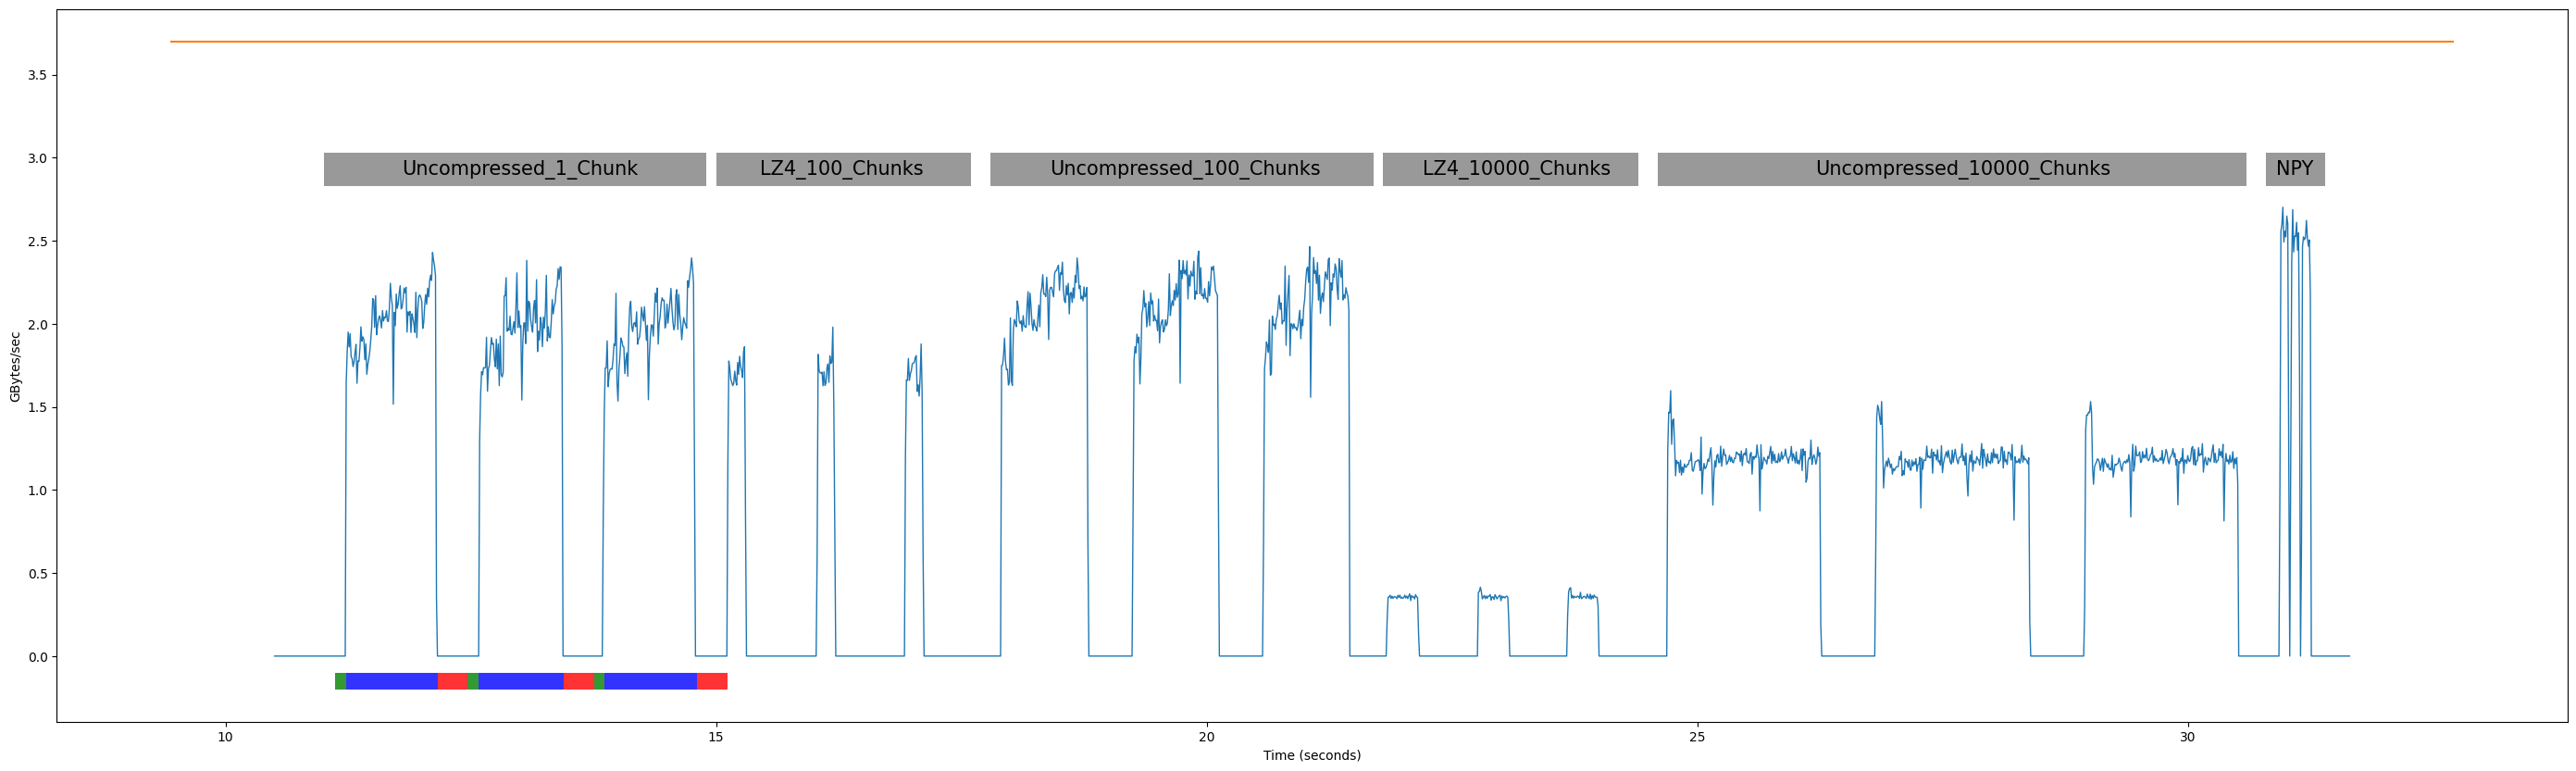

In [293]:
ax = (df["read_kbyte_per_s"].iloc[1050:-50] / 1E6).plot.line(figsize=(35, 10), linewidth=1)
ax.set_ylabel("GBytes/sec")
ax.set_xlabel("Time (seconds)")
ax.plot(ax.get_xlim(), (3.7, 3.7), label="Max observed performance (using `fio`)")

def add_rect(x, y=-0.2, width=0.1, height=0.1, facecolor='red'):
    rect = patches.Rectangle(xy=(x, y), width=width, height=height, edgecolor='none', facecolor=facecolor, alpha=0.8)
    ax.add_patch(rect)

init_color = 'green'
io_color = 'blue'

# First ZarrPythonLoadEntireArray on Uncompressed_1_Chunk
init_width = 0.11
memcpy_width = 0.31
io_width = 0.93

x=11.12
add_rect(x=x, width=init_width, facecolor=init_color)
x += init_width
add_rect(x=x, width=io_width, facecolor=io_color)
x += io_width
add_rect(x=x, width=memcpy_width)
x += memcpy_width

# Second ZarrPythonLoadEntireArray on Uncompressed_1_Chunk
add_rect(x=x, width=init_width, facecolor=init_color)
x += init_width
io_width = 0.87
add_rect(x=x, width=io_width, facecolor=io_color)
x += io_width
add_rect(x=x, width=memcpy_width)
x += memcpy_width

# Third ZarrPythonLoadEntireArray on Uncompressed_1_Chunk
init_width = 0.1
add_rect(x=x, width=init_width, facecolor=init_color)
x += init_width
io_width = 0.95
add_rect(x=x, width=io_width, facecolor=io_color)
x += io_width
add_rect(x=x, width=memcpy_width)
x += memcpy_width

txt_y = 2.9
txt_rect_h = 0.2
txt_rect_color = "grey"
txt_fontsize = 15
add_rect(x=11, y=txt_y - 0.07, width=3.9, height=txt_rect_h, facecolor=txt_rect_color)
ax.text(x=11.8, y=txt_y, s="Uncompressed_1_Chunk", fontsize=txt_fontsize)

add_rect(x=15, y=txt_y - 0.07, width=2.6, height=txt_rect_h, facecolor=txt_rect_color)
ax.text(x=15.45, y=txt_y, s="LZ4_100_Chunks", fontsize=txt_fontsize)

add_rect(x=17.8, y=txt_y - 0.07, width=3.9, height=txt_rect_h, facecolor=txt_rect_color)
ax.text(x=18.4, y=txt_y, s="Uncompressed_100_Chunks", fontsize=txt_fontsize)

add_rect(x=21.8, y=txt_y - 0.07, width=2.6, height=txt_rect_h, facecolor=txt_rect_color)
ax.text(x=22.2, y=txt_y, s="LZ4_10000_Chunks", fontsize=txt_fontsize)

add_rect(x=24.6, y=txt_y - 0.07, width=6, height=txt_rect_h, facecolor=txt_rect_color)
ax.text(x=26.2, y=txt_y, s="Uncompressed_10000_Chunks", fontsize=txt_fontsize)

add_rect(x=30.8, y=txt_y - 0.07, width=0.6, height=txt_rect_h, facecolor=txt_rect_color)
ax.text(x=30.9, y=txt_y, s="NPY", fontsize=txt_fontsize)

# ax.set_xlim((10.8, 15.1))
#step = ax.get_xticks()[1] - ax.get_xticks()[0]
#n = len(ax.get_xticks())
#ax.set_xticklabels(np.arange(0, n * step, step));